# WeatherPy
----

#### Data Analysis
*From the Northern Hemisphere temperature vs. latitude linear regression, there is a negative correlation between the latitude and temperature.  When we go away from the equatorial line (0° latitude) further to the north (to arctic point (90° latitude)), the temperatures decreases.  There is not a strong correlation, because, latitude is not the only variable affecting temperature.(probably altitude, being close to large water bodies, etc. affect the temperature as well.)

*From the Southern Hemisphere temperature vs. latitude linear regression, there is a positive correlation between the latitude and temperature.  When we go from the antarctic point (-90° latitude) further to the north (to the equatorial line (0° latitude)), the temperatures increases.  There is not a very strong correlation, because, latitude is not the only variable affecting temperature.(probably altitude, being close to large water bodies, etc. affect the temperature as well.)

*Humidity, Wind Speed and Cloudiness have no correlation with lattitude, looking at all the graphs for both Southern and Northern hemisphere data.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_code=[]
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country=citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    #I also added country code here
    if city not in cities:
        cities.append(city)
        country_code.append(country)
       
# Print the city count to confirm sufficient count

print(f"{len(country_code)} and {len(cities)}")

590 and 590


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_df=pd.DataFrame(cities, columns=["City"])
country_df=pd.DataFrame(country_code, columns=["Country"])
cities_df.head()


,City
0,upernavik
1,hermanus
2,punta arenas
3,ahipara
4,trairi


In [4]:
country_df.head()

,Country
0,gl
1,za
2,cl
3,nz
4,br


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

temp=[]
lat=[]
long=[]
clouds=[]
humidity=[]
wind=[]
date=[]
country=[]
city_name=[]

# Build partial query URL
#query_url = f"{url}appid={api_key}&q={city}&units={units}"
query_url = f"{url}appid={weather_api_key}&units={units}&q="   
print("----------------------------------")
print(f"Beginning Data Retrieval")
print("----------------------------------")

set_=1
record=1
for city in cities:

 
    try:
        
        print(f"Processing Record {record} of Set {set_}  |  {city}.")
        
        if record==50:
            set_=set_+1
            record=0
        record=record+1
        
        response=requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
    except Exception:
        print("City not found. Skipping...")

print("----------------------------------")    
print(f"Data Retrieval Complete")
print("----------------------------------")    
    
    

----------------------------------
Beginning Data Retrieval
----------------------------------
Processing Record 1 of Set 1  |  upernavik.
Processing Record 2 of Set 1  |  hermanus.
Processing Record 3 of Set 1  |  punta arenas.
Processing Record 4 of Set 1  |  ahipara.
Processing Record 5 of Set 1  |  trairi.
Processing Record 6 of Set 1  |  kodiak.
Processing Record 7 of Set 1  |  victoria.
Processing Record 8 of Set 1  |  vaini.
Processing Record 9 of Set 1  |  montlucon.
Processing Record 10 of Set 1  |  taolanaro.
City not found. Skipping...
Processing Record 11 of Set 1  |  taihe.
Processing Record 12 of Set 1  |  chokurdakh.
Processing Record 13 of Set 1  |  sylva.
Processing Record 14 of Set 1  |  jamestown.
Processing Record 15 of Set 1  |  georgetown.
Processing Record 16 of Set 1  |  saint-philippe.
Processing Record 17 of Set 1  |  busselton.
Processing Record 18 of Set 1  |  puerto del rosario.
Processing Record 19 of Set 1  |  bluff.
Processing Record 20 of Set 1  |  diks

Processing Record 27 of Set 4  |  lhuntshi.
City not found. Skipping...
Processing Record 28 of Set 4  |  maues.
Processing Record 29 of Set 4  |  carmen.
Processing Record 30 of Set 4  |  saint-pierre.
Processing Record 31 of Set 4  |  husavik.
Processing Record 32 of Set 4  |  pevek.
Processing Record 33 of Set 4  |  nizhneyansk.
City not found. Skipping...
Processing Record 34 of Set 4  |  chapais.
Processing Record 35 of Set 4  |  khatanga.
Processing Record 36 of Set 4  |  constitucion.
Processing Record 37 of Set 4  |  avarua.
Processing Record 38 of Set 4  |  oktyabrskiy.
Processing Record 39 of Set 4  |  cavalcante.
Processing Record 40 of Set 4  |  harper.
Processing Record 41 of Set 4  |  miragoane.
Processing Record 42 of Set 4  |  hovd.
Processing Record 43 of Set 4  |  okato.
Processing Record 44 of Set 4  |  wanning.
Processing Record 45 of Set 4  |  petropavlovsk-kamchatskiy.
Processing Record 46 of Set 4  |  samusu.
City not found. Skipping...
Processing Record 47 of Se

Processing Record 2 of Set 8  |  vestmannaeyjar.
Processing Record 3 of Set 8  |  muroto.
Processing Record 4 of Set 8  |  broome.
Processing Record 5 of Set 8  |  port-gentil.
Processing Record 6 of Set 8  |  flinders.
Processing Record 7 of Set 8  |  attawapiskat.
City not found. Skipping...
Processing Record 8 of Set 8  |  tasiilaq.
Processing Record 9 of Set 8  |  harlingen.
Processing Record 10 of Set 8  |  ullapool.
Processing Record 11 of Set 8  |  zeya.
Processing Record 12 of Set 8  |  leningradskiy.
Processing Record 13 of Set 8  |  umzimvubu.
City not found. Skipping...
Processing Record 14 of Set 8  |  acarau.
Processing Record 15 of Set 8  |  camana.
Processing Record 16 of Set 8  |  grand river south east.
City not found. Skipping...
Processing Record 17 of Set 8  |  sayanskiy.
City not found. Skipping...
Processing Record 18 of Set 8  |  armidale.
Processing Record 19 of Set 8  |  yeppoon.
Processing Record 20 of Set 8  |  boone.
Processing Record 21 of Set 8  |  esperan

Processing Record 25 of Set 11  |  moron.
Processing Record 26 of Set 11  |  viedma.
Processing Record 27 of Set 11  |  outlook.
Processing Record 28 of Set 11  |  virginia beach.
Processing Record 29 of Set 11  |  sao lourenco do sul.
Processing Record 30 of Set 11  |  yerofey pavlovich.
Processing Record 31 of Set 11  |  kalabo.
Processing Record 32 of Set 11  |  tagusao.
Processing Record 33 of Set 11  |  kaeo.
Processing Record 34 of Set 11  |  celestun.
Processing Record 35 of Set 11  |  teahupoo.
Processing Record 36 of Set 11  |  comitancillo.
Processing Record 37 of Set 11  |  phulji.
Processing Record 38 of Set 11  |  beringovskiy.
Processing Record 39 of Set 11  |  lorengau.
Processing Record 40 of Set 11  |  ostrovnoy.
Processing Record 41 of Set 11  |  khowst.
Processing Record 42 of Set 11  |  san quintin.
Processing Record 43 of Set 11  |  plettenberg bay.
Processing Record 44 of Set 11  |  panaba.
Processing Record 45 of Set 11  |  beira.
Processing Record 46 of Set 11  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df=pd.DataFrame({"City":city_name, "Lat":lat, "Lng":long, "Max Temp": temp, "Humidity":humidity, 
                          "Cloudiness":clouds, "Wind Speed":wind, "Country":country, "Date": date})

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        535 non-null    object 
 1   Lat         535 non-null    float64
 2   Lng         535 non-null    float64
 3   Max Temp    535 non-null    float64
 4   Humidity    535 non-null    int64  
 5   Cloudiness  535 non-null    int64  
 6   Wind Speed  535 non-null    float64
 7   Country     535 non-null    object 
 8   Date        535 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 37.7+ KB


In [7]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.79,-56.15,34.50,87,0,7.47,GL,1592439186
1,Hermanus,-34.42,19.23,48.99,84,21,1.01,ZA,1592439186
2,Punta Arenas,-53.15,-70.92,28.40,92,0,5.57,CL,1592438936
3,Ahipara,-35.17,173.17,60.96,80,63,8.70,NZ,1592439187
4,Trairi,-3.28,-39.27,75.61,90,13,8.43,BR,1592439187


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#Inspect Humidity Column if > 100%
weather_df["Humidity"].max()

100

In [9]:
#This descibe function also indicates the maximum humidity is 100
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,5.350000e+02
mean,20.201607,17.860523,66.512654,70.613084,47.444860,8.045327,1.592439e+09
std,34.206829,91.104986,14.427973,20.230549,37.628684,5.107005,7.995514e+01
min,-54.800000,-179.170000,28.400000,3.000000,0.000000,0.400000,1.592439e+09
25%,-8.150000,-62.150000,55.400000,59.500000,7.500000,4.030000,1.592439e+09
50%,24.090000,22.570000,68.000000,75.000000,40.000000,6.930000,1.592439e+09
75%,49.985000,99.895000,77.870000,86.000000,84.000000,11.410000,1.592439e+09
max,78.220000,179.320000,96.280000,100.000000,100.000000,31.270000,1.592439e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.

drop_data = weather_df.loc[(weather_df["Humidity"]>100)]

drop_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers

clean_city_data = weather_df.loc[(weather_df["Humidity"]<=100)]
clean_city_data.head()
#clean_city_data.info()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.79,-56.15,34.50,87,0,7.47,GL,1592439186
1,Hermanus,-34.42,19.23,48.99,84,21,1.01,ZA,1592439186
2,Punta Arenas,-53.15,-70.92,28.40,92,0,5.57,CL,1592438936
3,Ahipara,-35.17,173.17,60.96,80,63,8.70,NZ,1592439187
4,Trairi,-3.28,-39.27,75.61,90,13,8.43,BR,1592439187


In [12]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_data.to_csv(r'../output_data/cities.csv', index=False) 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [13]:
#Format the unix time
def startdt(data_frame):
    return time.strftime("%D", time.localtime(int(data_frame["Date"][0])))
 

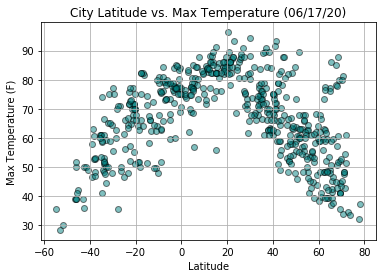

In [14]:

maxTemp=clean_city_data["Max Temp"].tolist()
latitude=clean_city_data["Lat"].tolist()
plt.scatter(latitude, maxTemp, marker="o", facecolors="teal", edgecolors="black",
            alpha=0.5)

plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.title(f'City Latitude vs. Max Temperature ({startdt(clean_city_data)})')
plt.grid(True)

plt.savefig(r'../output_data/plot1.png')
plt.show()

In [15]:
##Latitude vs. Humidity Plot

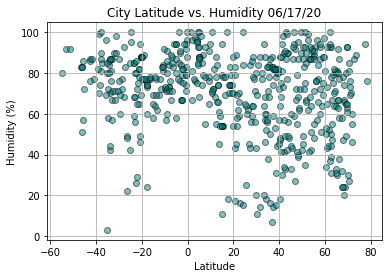

In [16]:
humid=clean_city_data["Humidity"].tolist()
plt.scatter(latitude, humid, marker="o", facecolors="teal", edgecolors="black",
            alpha=0.5)

plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title(f'City Latitude vs. Humidity {startdt(clean_city_data)}')
plt.grid(True)

plt.savefig(r'../output_data/plot2.png')
plt.show()

## Latitude vs. Cloudiness Plot

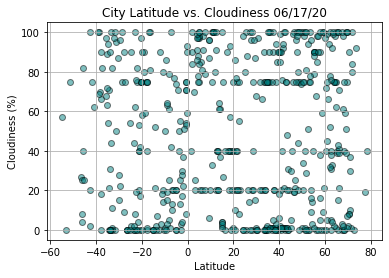

In [17]:
cloud=clean_city_data["Cloudiness"].tolist()
plt.scatter(latitude, cloud, marker="o", facecolors="teal", edgecolors="black",
            alpha=0.5)

plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.title(f'City Latitude vs. Cloudiness {startdt(clean_city_data)}')
plt.grid(True)

plt.savefig(r'../output_data/plot3.png')
plt.show()

## Latitude vs. Wind Speed Plot

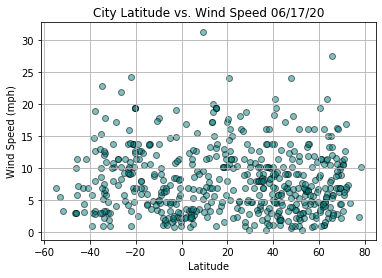

In [18]:
windsp=clean_city_data["Wind Speed"].tolist()

plt.scatter(latitude, windsp, marker="o", facecolors="teal", edgecolors="black",
            alpha=0.5)

plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.title(f'City Latitude vs. Wind Speed {startdt(clean_city_data)}')
plt.grid(True)

plt.savefig(r'../output_data/plot4.png')
plt.show()

## Linear Regression

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = clean_city_data.loc[(clean_city_data["Lat"]>=0)]
southern_hem_df = clean_city_data.loc[(clean_city_data["Lat"]<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4904282098488752
y = -0.51x + 88.5


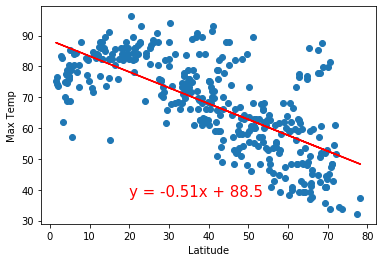

In [20]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-squared is: {rvalue**2}")
print(line_eq)


plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5397191665167688
y = 0.69x + 78.5


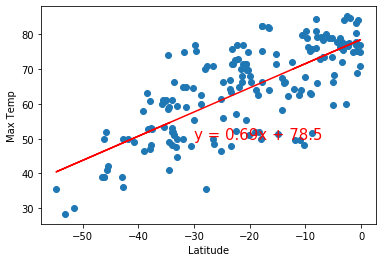

In [21]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-squared is: {rvalue**2}")
print(line_eq)


plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.014021368683931057
y = -0.13x + 73.09


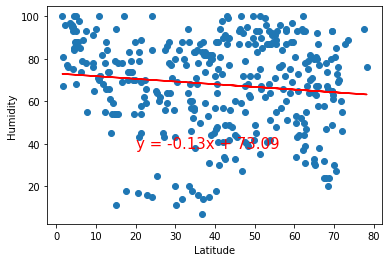

In [22]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
print(line_eq)


plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006336073404277832
y = 0.09x + 77.88


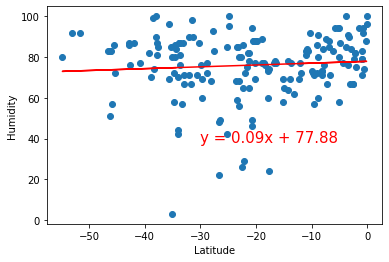

In [23]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,38),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
print(line_eq)


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005066071064090548
y = -0.13x + 55.18


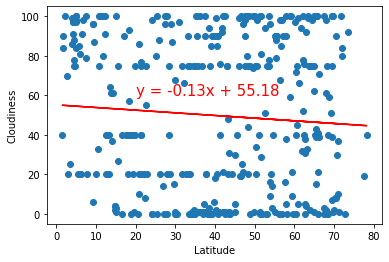

In [24]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
print(line_eq)


plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012292966375916942
y = -0.29x + 36.65


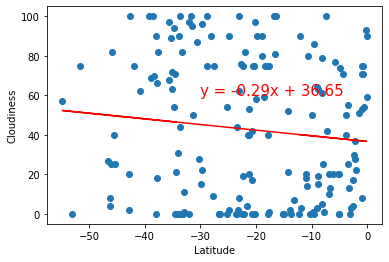

In [25]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
print(line_eq)


plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004747289804186782
y = -0.02x + 8.72


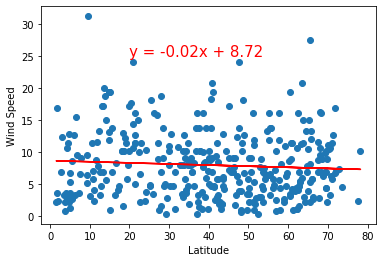

In [26]:
x_values = northern_hem_df['Lat']
y_values = northern_hem_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
print(line_eq)


plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006496573678164932
y = -0.03x + 7.49


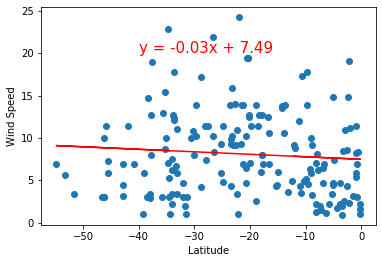

In [27]:
x_values = southern_hem_df['Lat']
y_values = southern_hem_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
print(line_eq)


plt.show()